In [105]:
# Import necessary libraries
import pandas as pd
import numpy as np

## 1. Load the Data:

- Load the dataset into a jupyter notebook. Download the data from here: Messy data

In [106]:
#load the data
data=pd.read_csv("messy_data.csv")

## 2. Inspect the data:

- Examine the data to understand its structure and identify the types of errors and
inconsistencies present.

In [107]:
# Check the shape of the dataset
print(data.shape)

(11000, 8)


In [108]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11000 non-null  int64  
 1   ID          11000 non-null  object 
 2   Name        8667 non-null   object 
 3   Age         9253 non-null   float64
 4   Email       9731 non-null   object 
 5   Join Date   8808 non-null   object 
 6   Salary      8761 non-null   float64
 7   Department  8745 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 687.6+ KB


In [109]:
# Display first 5 rows of the data
data.head(5)

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.0,Sales
1,1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.0,NaN
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.0,Marketing


## 3. Record QA Issues:
- Document data quality issues in the dataset field-wise to ensure clarity and
organisation

In [110]:
# QA Issues
qa_issues = {
    'Missing Values': data.isnull().sum(),
    'Duplicate Rows': data[data.duplicated()],
    'Invalid Email Formats': data[~data['Email'].str.contains(r'^[\w\.-]+@[\w\.-]+\.\w+$', na=False)],
    'Noise in Name Fields': data[data['Name'].str.contains(r'[^a-zA-Z\s]', na=False)],
    'Inconsistent Date Formats': data[pd.to_datetime(data['Join Date'], errors='coerce').isnull()],
    'Typos in Department Names': data[~data['Department'].isin(['HR', 'Finance', 'IT', 'Marketing'])],
    'Inconsistent Salary Values': data[~data['Salary'].replace({'\$': '', ',': ''}, regex=True).astype(float).notnull()]
}

# Print QA Issues
for issue, details in qa_issues.items():
    print(f"{issue}:\n{details}\n")


Missing Values:
Unnamed: 0       0
ID               0
Name          2333
Age           1747
Email         1269
Join Date     2192
Salary        2239
Department    2255
dtype: int64

Duplicate Rows:
       Unnamed: 0                                    ID            Name   Age  \
10002        6557  07727d57-4574-4a0f-9372-51e7e7d526e7             NaN   NaN   
10005        7708  418d64f6-5c24-4023-a19b-085664d8aa82             NaN   NaN   
10008        2470  07a02c66-def7-4a7b-8b5a-792c3742d3f0      Lisa Reyes  37.0   
10009        2846  e3628acd-d04a-4b74-9775-1aecb6b938ba             NaN   NaN   
10011        4168  6dd96a78-a797-404b-b47a-b5723ba8e605             NaN   NaN   
...           ...                                   ...             ...   ...   
10975        4685  2adebc64-900d-431a-93cd-118de4bb6eb7             NaN   NaN   
10978        3054  1ea7f125-698d-49dc-a97a-955b4dc4fc9b             NaN   NaN   
10988        6403  4edd1e6e-cfb5-4300-9c74-e9642836e134             NaN  

C:\Users\NoufiNoushad\AppData\Local\Temp\ipykernel_4628\3831108428.py:7: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  'Inconsistent Date Formats': data[pd.to_datetime(data['Join Date'], errors='coerce').isnull()],
C:\Users\NoufiNoushad\AppData\Local\Temp\ipykernel_4628\3831108428.py:7: UserWarning: Parsing '17/09/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  'Inconsistent Date Formats': data[pd.to_datetime(data['Join Date'], errors='coerce').isnull()],
C:\Users\NoufiNoushad\AppData\Local\Temp\ipykernel_4628\3831108428.py:7: UserWarning: Parsing '16/10/2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  'Inconsistent Date Formats': data[pd.to_datetime(data['Join Date'], errors='coerce').isnull()],
C:\Users\NoufiNoushad\AppData\Local\Temp\ipykernel_4628\3831108428.py:7: UserWarning: Pa

## 4. Handle Missing Values:
- Identify and handle missing values in the dataset. You can choose to fill them with
appropriate values (e.g., mean, median) or remove rows/columns with excessive
missing values.

In [111]:
# Check for missing values
missing_values=data.isnull().sum()

In [112]:
missing_values

Unnamed: 0       0
ID               0
Name          2333
Age           1747
Email         1269
Join Date     2192
Salary        2239
Department    2255
dtype: int64

### 4.1 Handling missing values: Name, Email

In [113]:
# Remove rows where Name or Email is missing
data.dropna(subset=['Name','Email'],inplace=True) 

In [114]:
#check if any more null values in Name field
data['Name'].isnull().sum()

0

In [115]:
#check if any more null values in Email field
data['Email'].isnull().sum()

0

### 4.2 Handling missing values: Department


In [116]:
#Department is a categorical column
#Null values in Department column is filled with the mode
dept=data['Department'].mode()
print("Mode of Department is ",dept[0])
data['Department']=data['Department'].fillna(dept[0])

Mode of Department is  Support


In [117]:
#check if any more null values in Department field
data['Department'].isnull().sum()

0

### 4.3 Handling missing values: Salary


In [118]:
#Salary is a numerical column
#Null values in Salary column is filled with the mean
sal=data['Salary'].mean()
data['Salary']=data['Salary'].fillna(sal)

In [119]:
#check if any more null values in Salary field
data['Salary'].isnull().sum()

0

### 4.4 Handling missing values:Age



In [120]:
#Age is a numerical column
#Null values in Age column is filled with the median
age=data['Age'].median()
data['Age']=data['Age'].fillna(age)


In [121]:
#check if any more null values in Age field
data['Age'].isnull().sum()

0

### 4.5 Handling missing values: Join Date

In [122]:
#Null values in Join Date is filled with the mode
common_date=data['Join Date'].mode()
common_date
data['Join Date']=data['Join Date'].fillna(common_date[0])

In [123]:
#check if any more null values in Join Date field
data['Join Date'].isnull().sum()

0

## 5. Remove Duplicates:
- Identify and remove duplicate rows to ensure each record is unique.

In [124]:
#print the duplicate rows and the number of duplicate rows
duplicates=data[data.duplicated()]
print("Duplicate rows in the dataframe are:")
print (duplicates)
print("Number of duplicate rows: ")
print(data.duplicated().sum())

Duplicate rows in the dataframe are:
       Unnamed: 0                                    ID               Name  \
10008        2470  07a02c66-def7-4a7b-8b5a-792c3742d3f0         Lisa Reyes   
10031        8691  fab90c01-1b0d-4f79-9edc-7898320defb0  Bradley Fernandez   
10038        1402  00793135-7451-414b-90c1-a542072d2e6e      Brandon Arias   
10047        4217  8fa71f42-a18e-41c4-803b-6f3baa4318d8          Lori Boyd   
10049        3484  603126e6-2993-4020-92b2-556875628eec       Teresa Downs   
...           ...                                   ...                ...   
10890        1434  6cbb745a-5c32-45d4-8e6f-82989c8910a8      Randy Russell   
10901        5893  faa607cf-70f7-4bae-86d3-423c79bd9030      Gary Mckenzie   
10947        6902  1b313986-84a9-4339-9bff-c6b5fe6891da         Tammy Cruz   
10956        1357  64629d72-0539-4bf0-865d-3017b918bba5       Erika Hoover   
10999        7107  fc25a38a-5747-46eb-b6d3-7173f8255809     Caroline Ochoa   

        Age               

In [125]:
#drop the duplicate rows
data.drop_duplicates(inplace=True)
#ensure no more duplicate rows
data.duplicated().sum()

0

## 6. Correct Email Formats:
- Identify and correct invalid email formats. Ensure that all email addresses follow a
standard format (e.g., username@domain.com).
- have only professional emails in the final list.

In [126]:
data['Email'].unique()

array(['xlopez@hotmail.com', 'Jillian Jenkins', 'jscottgreen.biz', ...,
       'raygabrielle@hotmail.com', 'weavermary@yahoo.com',
       'molly89gmail.com'], dtype=object)

In [127]:
# Function to validate email addresses with correct format and include only professional emails
import re
email_regex = r'^[\w\.-]+@[\w\.-]+\.(com|org|edu|net|gov|info|io)$'
def is_valid_email(email):
    return bool(re.match(email_regex, email))

#print invalid email ids
print("Invalid email ids : ")
for email in data['Email']:
    if is_valid_email(email):
        continue
    else:
        print(f"{email}")
        


Invalid email ids : 
Jillian Jenkins
jscottgreen.biz
luke56gonzalez.com
pperkinshotmail.com
josephrobertsongmail.com
katherinewallacehotmail.com
longjennifer@parker.biz
Denise Martin
amyclements@lee.biz
garciaralph@hayes-hernandez.biz
matthewvazquezhotmail.com
robertflowers@diaz.biz
rodney86fisher.com
trobertsongmail.com
coopermichellefranklin.com
peterskarenstafford.net
kevin62smith.info
hgarciajackson.info
william65yahoo.com
parksandrea@brown.biz
Logan Daniels
evargasgmail.com
griffinbriansingleton.net
hodgecoreyyahoo.com
rileyellenthomas.biz
derek90ryan.com
mcgrathryanyahoo.com
millerjustinmason.com
jduffygmail.com
Andrew Mason
Daniel Payne
eringonzalezli.com
jasminejonesgmail.com
afoxhotmail.com
pjohnsonhotmail.com
wrightchristopherbenson.net
evanscherylgmail.com
Samuel Davis
Kathleen Richards
Jennifer Miller
jamesjacksonbean.com
pauldeleoncole.com
ugarciahoward-tyler.com
aprilwilliamsgmail.com
lindseylittleyahoo.com
ffowlerhotmail.com
danielcontrerasmunoz-perez.com
zspencersmith-g

In [128]:
#drop rows with invalid email ids and keeping only the professional ones
data=data[data['Email'].apply(is_valid_email)]

## 7. Clean Name Fields:
- Remove any noise added to names. Ensure names are consistently formatted and
free from extraneous words.

To clean and format names in the dataset, we need to ensure they are consistently formatted and free from extraneous words.
Remove extra spaces Remove any unwanted characters or noise Standardize the capitalization (e.g., title case)



In [129]:
#function to clean Name 
def clean_name(name):
    if pd.isna(name):
        return None 
    #remove extra spaces and unwanted characters
    #remove non alphabetic characters
    cleaned=re.sub(r'[^a-zA-Z\s]','',name)
    #replace multiple spaces witha a single space
    cleaned=re.sub(r'\s+',' ',cleaned)
    # remove trailing or leading spaces
    cleaned=cleaned.strip() 
     #convert to title case
    cleaned=cleaned.title()
    return cleaned

In [130]:
data['Name'] = data['Name'].apply(clean_name)

# Display the cleaned names
print("Cleaned Names:")
print(data['Name'].head())

Cleaned Names:
0     Hunter Thomas
4         Julia Lee
5       Lisa Bailey
9        Jay Fisher
10     Craig Conway
Name: Name, dtype: object


In [131]:
#remove extraneous words
import nltk
nltk.download('words')
from nltk.corpus import words

# Create a set of English words for quick lookup
english_words = set(words.words())

def contains_english_extraneous(name):
    if pd.isna(name):
        return False
    # Split the name into words
    name_words = name.split()
    # Check if any word is in the set of English words
    for word in name_words:
        if word.lower() in english_words:
            return True
    return False

# Create a new column to flag names with extraneous English words
data['has_english_extraneous'] = data['Name'].apply(contains_english_extraneous)

# Filter names that contain English extraneous words
english_extraneous_names = data[data['has_english_extraneous']]

# Display the names with extraneous English words
print("Names Containing Extraneous English Words:")
print(english_extraneous_names[['Name']].head())

Names Containing Extraneous English Words:
              Name
4        Julia Lee
5      Lisa Bailey
9       Jay Fisher
12     Amber Marsh
26  Lori Hernandez


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\NoufiNoushad\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [132]:
data['Name'].head()

0     Hunter Thomas
4         Julia Lee
5       Lisa Bailey
9        Jay Fisher
10     Craig Conway
Name: Name, dtype: object

## 8. Standardise Date Formats:
- Ensure all dates in the 'Join Date' column follow a consistent format (e.g.,
YYYY-MM-DD).

In [133]:
# Convert 'Join Date' to datetime and format it
data['Join Date'] = pd.to_datetime(data['Join Date'], errors='coerce').dt.strftime('%Y-%m-%d')
data['Join Date']

C:\Users\NoufiNoushad\AppData\Local\Temp\ipykernel_4628\3145294081.py:2: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Join Date'] = pd.to_datetime(data['Join Date'], errors='coerce').dt.strftime('%Y-%m-%d')
C:\Users\NoufiNoushad\AppData\Local\Temp\ipykernel_4628\3145294081.py:2: UserWarning: Parsing '16/10/2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Join Date'] = pd.to_datetime(data['Join Date'], errors='coerce').dt.strftime('%Y-%m-%d')
C:\Users\NoufiNoushad\AppData\Local\Temp\ipykernel_4628\3145294081.py:2: UserWarning: Parsing '20/07/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Join Date'] = pd.to_datetime(data['Join Date'], errors='coerce').dt.strftime('%Y-%m-%d')
C:\Users\NoufiNoushad\AppData\Local\Temp\ipykernel_4628\3145294081.py:2: UserWarning: Parsi

0        2022-03-31
4        2022-03-31
5        2016-10-15
9        2022-12-08
10       2022-03-31
            ...    
10990    2020-06-11
10991    2021-08-05
10994    2022-03-31
10997    2006-08-15
10998    2020-10-09
Name: Join Date, Length: 6111, dtype: object

## 9. Correct Department Names:
- Identify and correct typos in the 'Department' column. Standardise the department
names to ensure consistency (e.g., HR, Engineering, Marketing, Sales, Support).

In [134]:
#print unique department names
departments=data['Department'].unique()
departments

array(['Sales', 'Marketing', 'SupportE', 'HR', 'Engineering', 'SalesA',
       'Salesw', 'SalesK', 'MarketingU', 'Support', 'Supporty',
       'Marketinge', 'MarketingR', 'Marketingv', 'HRv', 'SalesM',
       'EngineeringL', 'MarketingQ', 'HRs', 'Supportj', 'Salesd',
       'Marketingu', 'SalesU', 'MarketingH', 'Salesj', 'Saleso', 'SalesZ',
       'Engineeringe', 'Engineeringm', 'SalesW', 'Engineeringp', 'SalesC',
       'SupportC', 'EngineeringK', 'SalesN', 'HRo', 'SupportB', 'HRi',
       'Supportg', 'Supporta', 'HRn', 'Supportm', 'Supporto',
       'EngineeringH', 'Marketingw', 'HRr', 'Salesy', 'MarketingD', 'HRE',
       'Marketingm', 'HRw', 'Supportk', 'SupportS', 'EngineeringD',
       'Marketingp', 'Marketingz', 'Salesl', 'Salesr', 'SupportT',
       'Engineeringn', 'MarketingO', 'SalesF', 'Salesz', 'Marketingt',
       'Engineeringv', 'HRL', 'HRI', 'HRW', 'EngineeringR', 'Marketingk',
       'Engineeringi', 'Salese', 'Saless', 'Salesn', 'HRy', 'SalesD',
       'HRm', 'HRz', 'Ma

In [135]:

# Function to standardize department names using regex
def standardize_department_name(department):
    # Create a mapping for common department names
    department_mapping = {
        r'Support[^\s]*': 'Support',
        r'Sales[^\s]*': 'Sales',
        r'Marketing[^\s]*': 'Marketing',
        r'Engineering[^\s]*': 'Engineering',
        r'HR[^\s]*': 'HR'
    }
    
    for pattern, correct_name in department_mapping.items():
        if re.match(pattern, department, re.IGNORECASE):
            return correct_name
    
    return department  # return the original if no match

# Apply the standardization function
data['Department'] = data['Department'].apply(standardize_department_name)

# Display the standardized DataFrame
print(data['Department'].unique())


['Sales' 'Marketing' 'Support' 'HR' 'Engineering']


In [136]:
#Check Department Data
data['Department'].head(10)

0           Sales
4       Marketing
5         Support
9              HR
10    Engineering
12    Engineering
13          Sales
14      Marketing
22             HR
25      Marketing
Name: Department, dtype: object

## 10. Handle Salary Noise:
- Identify and handle any noise in the 'Salary' column. Ensure salary values are within a
reasonable range and free from random fluctuations.

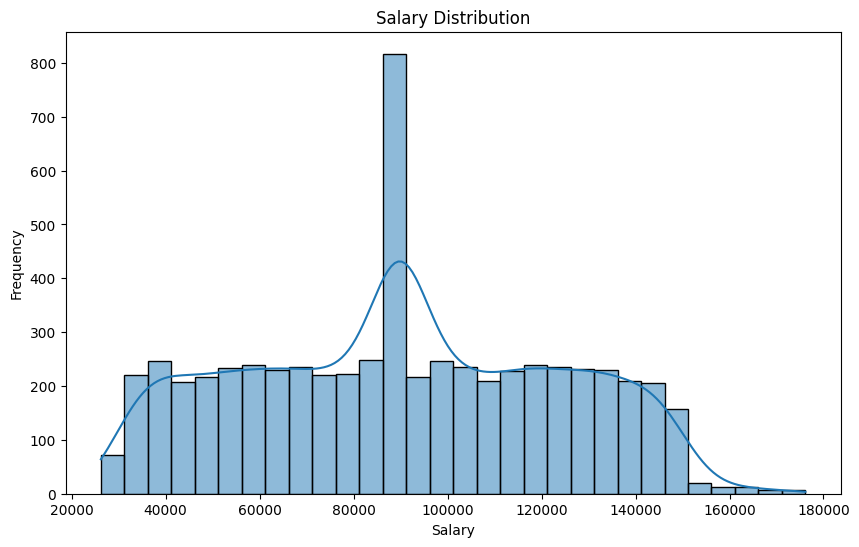

In [137]:
#Plot the Salary distribution using a histogram
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data['Salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

Find the outliers to remove any noise in Salary field, using a box plot or z-score method

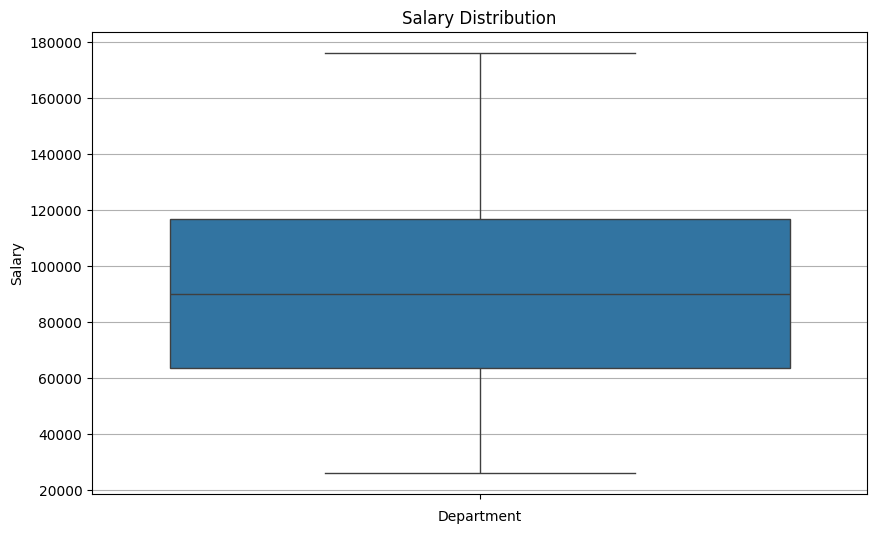

In [138]:
# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data['Salary'])
plt.title('Salary Distribution')
plt.ylabel('Salary')
plt.xlabel('Department')
plt.grid(axis='y')
plt.show()


The box plot shows no outliers

In [139]:
# optional method to calculate the number of outliers
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Salary'] < lower_bound) | (data['Salary'] > upper_bound)]

# Display results
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers:")
print(outliers)
print(f"Number of outliers detected: {outliers.shape[0]}")

Lower Bound: -16555.714333777592
Upper Bound: 197068.62860026656
Outliers:
Empty DataFrame
Columns: [Unnamed: 0, ID, Name, Age, Email, Join Date, Salary, Department, has_english_extraneous]
Index: []
Number of outliers detected: 0


So no outliers

In [140]:
#find ouliers using z-score
from scipy import stats

# Calculate Z-scores
data['Salary_z'] = stats.zscore(data['Salary'])

# Set a threshold (e.g., 3 or -3)
threshold = 3
outliers_z = data[(data['Salary_z'] > threshold) | (data['Salary_z'] < -threshold)]
print(f"Number of outliers detected using Z-score: {outliers_z.shape[0]}")

Number of outliers detected using Z-score: 0


 No specific outliers were found in any of the methods implemented above.So the Salary field is free of any noise and the histogram shows salary values are within a reasonable range and free from random fluctuations. 

In [141]:
# Save the cleaned data
data.to_csv('cleaned_data.csv', index=False)